# Proyecto de Análisis de Datos con Deep Learning  
## Clasificación de Enfermedades en Hojas de Tomate mediante Redes Neuronales Convolucionales (CNN)

**Curso:** ACI777 – Análisis de Datos  
**Profesor:** Eduardo Opazo  

**Integrantes del grupo:**  
- Cristian Acevedo  
- Baythiare Carrizo  
- Paola Quinde  

---

## Descripción General del Notebook

Este notebook implementa un flujo completo de Deep Learning para la clasificación automática de enfermedades en hojas de tomate utilizando una arquitectura basada en **MobileNetV2** y técnicas de **Transfer Learning** y **Fine-Tuning**.

El flujo general incluye:

1. Montaje de Google Drive y carga del dataset comprimido (.zip).  
2. Descompresión del dataset y verificación de su estructura interna.  
3. Preparación del dataset mediante generadores con preprocesamiento y data augmentation.  
4. Construcción del modelo CNN basado en MobileNetV2 (transfer learning).  
5. Entrenamiento inicial del modelo (Fase 1).  
6. Entrenamiento avanzado con Fine-Tuning (Fase 2).  
7. Evaluación del modelo mediante métricas estándar.  
8. Guardado del modelo entrenado en formato Keras (.h5).  
9. Conversión del modelo a TensorFlow Lite (TFLite) para su uso en hardware embebido.  
10. Pruebas de inferencia sobre imágenes nuevas.

Este notebook corresponde al proyecto de la cátedra ACI777 – Análisis de Datos.



## Importancia de Visualizar las Enfermedades y su Rol en la Economía Chilena

Comprender visualmente las enfermedades foliares del tomate no es un detalle accesorio: es el punto de partida para dimensionar un problema que trasciende la agricultura y se conecta directamente con la economía real, la seguridad alimentaria y la estructura productiva chilena. Chile mantiene una matriz agrícola estratégica con cerca de 23.000 hectáreas dedicadas al cultivo del tomate, lo que la convierte en la hortaliza de mayor relevancia económica nacional tanto por su uso en el mercado interno como por su rol fundamental en la industria procesadora (pastas, salsas, deshidratados) (ODEPA, 2025; Redagrícola, 2023; INIA, s.f.).

Durante 2024–2025, el tomate representó el **17,9% del valor total comercializado en el mercado mayorista hortícola**, ubicándose como el producto más transado del país, por sobre la cebolla y el pimiento (Redagrícola, 2023). En el ámbito industrial, Chile exportó más de **192 mil toneladas** de tomate procesado por un valor superior a **159 millones de dólares** en 2020, situándose como uno de los principales actores latinoamericanos y ocupando posiciones destacadas en exportaciones de pasta y derivados (INIA, s.f.; ODEPA, 2025). Territorialmente, la mayor parte de la producción se concentra en O’Higgins y Maule, consolidadas como zonas hortícolas estratégicas (ODEPA, 2025).

Las enfermedades foliares generan pérdidas significativas cada temporada. Dependiendo de la presión de plagas y condiciones ambientales, las infecciones pueden reducir entre un **30% y 70% del rendimiento**, especialmente cuando intervienen virus transmitidos por insectos vectores como la mosquita blanca y trips (FIC-R, 2024; INIA, s.f.). Estas pérdidas no solo impactan el rendimiento, sino que incrementan los costos de manejo, el uso de fungicidas, la rotación forzada de cultivos y el deterioro acumulado de suelos, infraestructura hídrica y sistemas de producción.

La vulnerabilidad es especialmente alta en pequeños y medianos productores, cuya superficie productiva —en zonas como Quillota y Valparaíso— no supera en promedio **1,6 hectáreas por unidad** y donde el acceso a diagnóstico temprano o asesoría técnica profesional resulta limitado (Gobierno Regional de Valparaíso, 2025). Esta brecha técnico-productiva profundiza desigualdades territoriales y reduce la competitividad del sector frente a desafíos fitosanitarios emergentes.

En este contexto, visualizar las enfermedades foliares —como se observa en las siguientes imágenes— permite dimensionar la complejidad del diagnóstico. Muchas lesiones tienen patrones morfológicos similares, lo que puede dificultar la identificación incluso para agricultores experimentados (INIA, 2017; Manual Fitosanitario, 2022). Comprender esta complejidad es fundamental para apreciar el impacto real de la inteligencia artificial —especialmente las redes neuronales convolucionales (CNN)— en el diagnóstico temprano, la gestión del riesgo y la eficiencia productiva (FIC-R, 2024; INIA, s.f.).

En síntesis, la observación visual no es un ejercicio anecdótico: constituye un puente necesario entre la realidad biológica del cultivo y la adopción de tecnologías avanzadas que permiten anticipar pérdidas, elevar la productividad y mejorar la sostenibilidad del sector hortícola, que es esencial para la economía chilena y la seguridad alimentaria.

## Visualización de Enfermedades en Hojas de Tomate

Tabla de referencia con imágenes estables para Google Colab (Fuente: Wikimedia Commons & Flickr Static).

| Enfermedad (Español / Inglés) | Visualización | Descripción Práctica |
| :--- | :---: | :--- |
| **Mancha Bacteriana**<br>*(Bacterial Spot)* | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Xanthomonas_campestris_pv._vesicatoria01.jpg/320px-Xanthomonas_campestris_pv._vesicatoria01.jpg" width="180" alt="Bacterial Spot"> | Manchas pequeñas, angulares y oscuras con posible halo amarillo. |
| **Tizón Temprano**<br>*(Early Blight)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Early_blight_on_tomato_leaves_(7871930010).jpg?width=300" width="180" alt="Early Blight"> | Manchas marrones con anillos concéntricos marcados (aspecto de “ojo de buey”). |
| **Tizón Tardío**<br>*(Late Blight)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Tomato_late_blight_leaf_curl_2_(5816171413).jpg?width=300" width="180" alt="Late Blight"> | Manchas grandes, oscuras y húmedas, parecidas a quemaduras por helada. |
| **Moho de la Hoja**<br>*(Leaf Mold)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Tomato_Leaf_Mold.jpg?width=300" width="180" alt="Leaf Mold"> | Manchas amarillas en el haz y moho aterciopelado gris/verde oliva en el envés. |
| **Septoriosis**<br>*(Septoria Leaf Spot)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Septoria_leaf_spot_symptoms_on_tomato_leaf_(Septoria_lycopersici_on_Solanum_lycopersicum_leaf).jpg?width=300" width="180" alt="Septoria"> | Muchas manchas pequeñas circulares con centro gris claro/blanco y borde oscuro. |
| **Ácaros / Arañuela Roja**<br>*(Spider Mites)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Solanum_lycopersicum_-_spider_mite_-Clemson_University_-_USDA.jpg?width=300" width="180" alt="Spider Mites"> | Punteado fino amarillento (clorosis); hoja con aspecto pálido, bronceado y con posible telaraña fina. |
| **Mancha Objetivo**<br>*(Target Spot)* | <img src="https://live.staticflickr.com/65535/48592395357_4f107663e2_w.jpg" width="180" alt="Target Spot"> | Lesiones marrones con anillos concéntricos y centro claro; similar al tizón temprano pero con anillos más difusos. |
| **Virus del Mosaico**<br>*(Tomato Mosaic Virus)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Virus_tomate.jpg?width=300" width="180" alt="Mosaic Virus"> | Patrón de mosaico con parches verde claro y oscuro, a menudo con hojas deformadas. |
| **Virus de la Cuchara**<br>*(Yellow Leaf Curl Virus)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Yellow_curl_leaf_disease_Pj_IMG_3162.jpg?width=300" width="180" alt="YLCV"> | Hojas enrolladas hacia arriba (“cuchara”), amarillentas y planta de porte reducido. |
| **Sana (Saludable)**<br>*(Healthy)* | <img src="https://commons.wikimedia.org/wiki/Special:FilePath/Healthy_tomato_leaves_(7871755330).jpg?width=300" width="180" alt="Healthy Leaf"> | Hoja verde uniforme, bien expandida, sin manchas, necrosis ni deformaciones visibles. |

# ¿Qué Revelan Estas Imágenes sobre Chile, la Agricultura y la Tecnología?

Al observar estas imágenes en conjunto, es evidente que el problema de clasificación es mucho más complejo de lo que aparenta. Las diferencias entre enfermedades suelen ser sutiles: tonos, texturas, patrones concéntricos, mohos, decoloraciones casi imperceptibles. Esta complejidad explicaría por qué un diagnóstico visual tradicional depende tanto de la experiencia individual del agricultor o asesor técnico, lo cual genera una brecha profunda entre zonas rurales y urbanas, y entre pequeños y grandes productores.

Aquí es donde el uso de CNN deja de ser un ejercicio académico y se convierte en una herramienta con impacto económico directo para Chile. La detección temprana de enfermedades puede reducir pérdidas, optimizar el uso de insumos, evitar aplicaciones químicas innecesarias y mejorar la continuidad productiva. Para un país exportador, cada hoja sana se traduce en seguridad alimentaria, competitividad internacional y reducción de costos logísticos asociados al descarte.

La inteligencia artificial permite democratizar el conocimiento agrícola: un pequeño agricultor de San Clemente o Quillota podrá acceder al mismo nivel de precisión diagnóstica que un agrónomo especializado trabajando para una gran empresa. Esto no solo reduce brechas, sino que transforma la forma en que Chile enfrenta la agricultura del futuro: con decisiones basadas en datos, sostenibilidad ambiental y eficiencia productiva.

Finalmente, estas imágenes hacen evidente la justificación técnica del proyecto. La similitud entre muchas enfermedades demuestra que el problema no puede resolverse con reglas simples o análisis visual manual. Las CNN sobresalen precisamente porque capturan patrones invisibles para el ojo humano: microtexturas, gradientes, bordes, combinaciones de color que, en su conjunto, permiten clasificar con precisión patologías que incluso especialistas confunden.

Este proyecto, por tanto, no solo aborda un desafío técnico: se alinea con tendencias globales de agricultura inteligente, fortalece la resiliencia productiva del país y contribuye a un futuro donde Chile puede transformar datos en mejores decisiones, más producción y una economía agrícola más equitativa.


## 1. Montaje de Google Drive y Verificación del Entorno

En esta sección se realiza el montaje de Google Drive para acceder al dataset almacenado en la nube.  
Además, se verifica el entorno de trabajo y la existencia del archivo comprimido que contiene las imágenes del proyecto.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install tensorflow keras-core


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 47.1 MB/s eta 0:00:00


## 2. Descompresión del Dataset y Validación de la Estructura de Directorios

Una vez montado Google Drive, se procede a:

- Cargar el archivo `.zip` con las imágenes del dataset.  
- Descomprimir su contenido en el directorio de trabajo (`/content`).  
- Verificar que la estructura final sea compatible con `flow_from_directory`, es decir:



In [ ]:
# Copiar el archivo ZIP desde Drive a Colab
!cp "/content/drive/MyDrive/tomate_data.zip" /content/data.zip

# Descomprimir
!unzip -o /content/data.zip -d /content/

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: /content/tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: /content/tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: /content/tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: /content/tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: /content/tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: /content/tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: /content/tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G

## **3. Preparación del Dataset y Generadores de Imágenes**

En esta sección se configuran los **generadores de imágenes** que alimentarán al modelo durante el entrenamiento y la validación.  
Para ello utilizamos `ImageDataGenerator`, que permite:

- Aplicar **aumentación de datos (data augmentation)** al conjunto de entrenamiento, mejorando la capacidad de generalización del modelo.
- Realizar **solo normalización** en el conjunto de validación, evitando distorsionar las imágenes reales.
- Ajustar todas las imágenes al tamaño requerido por MobileNetV2: **160 × 160 píxeles**.
- Aplicar el preprocesamiento estándar de MobileNetV2 mediante `preprocess_input`.

Las rutas establecidas para los conjuntos son:

- `/content/tomato/train` → Conjunto de entrenamiento  
- `/content/tomato/val` → Conjunto de validación

A continuación se construyen los generadores con sus respectivos parámetros de transformación.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Tamaño estándar para MobileNetV2
TARGET_SIZE = (160, 160)
BATCH_SIZE = 32

# Directorios de entrenamiento y validación
train_dir = "/content/tomato/train"
val_dir   = "/content/tomato/val"

# 🔥 Data augmentation para entrenamiento
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# ❄ Validación sin augmentation (solo normalización)
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Generador de entrenamiento
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Generador de validación
# Generador de validación
validation_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False   # <- IMPORTANTE
)



# Mapa de clases
label_map = training_set.class_indices
label_map

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

## 4. Construcción del Modelo CNN con MobileNetV2 (Transfer Learning – Fase 1)

En esta sección se construye el modelo de clasificación basado en **MobileNetV2**, utilizando la técnica de **Transfer Learning**.  
El objetivo de esta fase es entrenar únicamente la parte superior del modelo, manteniendo congeladas las capas convolucionales pre-entrenadas.

---

### **1. Carga del modelo base MobileNetV2**
Se importa MobileNetV2 sin su parte superior (`include_top=False`) para usarlo como extractor de características.

**Características principales:**
- Pesos pre-entrenados en **ImageNet**
- Entrada ajustada a **160×160×3**
- Sin la cabeza densa original

---

###  **2. Congelamiento total de las capas (Fase 1)**  
Todas las capas convolucionales se congelan (`layer.trainable = False`) para evitar modificar los pesos pre-entrenados.

**Objetivo:**  
Entrenar únicamente la nueva parte densa para adaptarla al dataset de tomates antes del fine-tuning.

Se imprime cuántas capas quedan entrenables (debe ser **0** en esta fase).

---

###  **3. Construcción de la red completa**
Se añade una nueva cabeza de clasificación encima del modelo base:

- `Flatten()` para convertir los mapas de características en un vector
- `Dense(128, activation='relu')` para aprendizaje no lineal
- `Dropout(0.4)` para reducir sobreajuste
- `Dense(num_classes, activation='softmax')` como capa final de clasificación multiclase

---

###  **4. Compilación del modelo (Fase 1)**
El modelo se compila con:

- **Optimizador:** Adam  
- **Pérdida:** Categorical Crossentropy (clasificación multiclase)  
- **Métrica:** Accuracy  

Este es el modelo que se entrenará durante la **fase de Transfer Learning**.

---

### Resultado esperado  
Al ejecutar `model.summary()`, debe mostrarse:

- MobileNetV2 con **0 capas entrenables**
- Nueva cabeza densa con ≈ **4 millones de parámetros entrenables**
- Total del modelo ≈ **6.3 millones de parámetros**

## Justificación Técnica de la Arquitectura MobileNetV2

La elección de MobileNetV2 para este proyecto no es arbitraria: responde a criterios técnicos, prácticos y estratégicos que lo convierten en una de las mejores opciones para tareas de clasificación de imágenes en entornos con recursos limitados.

###  1. Arquitectura liviana y eficiente
MobileNetV2 fue diseñada específicamente para dispositivos móviles y sistemas embebidos. Utiliza **convoluciones separables en profundidad**, una técnica que reduce drásticamente el número de parámetros y operaciones matemáticas sin sacrificar rendimiento.  
Esto permite:

- entrenamientos más rápidos,  
- menor consumo de memoria,  
- modelos finales más pequeños y fácilmente exportables.

Este equilibrio es especialmente relevante en proyectos que podrían implementarse en campo agrícola mediante IoT o edge computing.

---

###  2. Excelente desempeño con Transfer Learning
MobileNetV2 viene preentrenada con el dataset ImageNet, lo que significa que ya aprendió a reconocer:

- bordes,  
- colores,  
- texturas,  
- patrones visuales complejos.

Estas características se transfieren directamente al problema de clasificación de enfermedades en hojas de tomate, reduciendo dramáticamente el tiempo de entrenamiento y aumentando la precisión del modelo desde las primeras épocas.

---

### 3. Capacidad para capturar patrones visuales finos
Las enfermedades foliares presentan diferencias sutiles: manchas, halos, texturas irregulares o patrones virales.

MobileNetV2 es particularmente efectiva identificando:

- texturas microscópicas,  
- cambios de color en gradientes,  
- patrones concéntricos (Early Blight/Target Spot),  
- bordes difusos o irregulares (Late Blight/Leaf Mold).

Esto lo convierte en un modelo ideal para tareas agrícolas donde la distinción entre clases es compleja incluso para especialistas humanos.

---

### 4. Computacionalmente viable para Chile y su realidad agrícola
En contextos rurales, donde las capacidades computacionales suelen ser limitadas, un modelo compacto como MobileNetV2 permite pensar en implementaciones reales:

- celulares de bajo costo,  
- dispositivos ESP32 con visión,  
- Raspberry Pi,  
- drones de bajo peso,  
- apps móviles offline,  
- sensores IoT portátiles.

A diferencia de modelos pesados (ResNet, Inception, EfficientNet grande), MobileNetV2 permite llevar la IA directamente “al campo”, sin depender de la nube.

---

###  5. Resultados comprobados en agricultura digital
MobileNetV2 es uno de los modelos más utilizados en papers de:

- enfermedades de cultivos,  
- clasificación de hojas,  
- detección de plagas,  
- sistemas de monitoreo agrícola.

Su rendimiento estable y su bajo costo computacional lo han convertido en un estándar en agricultura inteligente (*smart farming*).

---

###  6. Perfecto para estudiantes y proyectos universitarios
MobileNetV2 permite:

- entrenar en Google Colab sin agotar la GPU,  
- obtener resultados rápidos y estables,  
- experimentar con Fine-Tuning de forma controlada,  
- exportarlo fácilmente a TFLite o TensorFlow.js.

Esto se alinea perfectamente con los objetivos del curso ACI777.

---

### Conclusión
MobileNetV2 es la arquitectura óptima para este proyecto porque combina:

- **eficiencia computacional**,  
- **alta precisión**,  
- **compatibilidad con dispositivos de bajo costo**,  
- **velocidad de entrenamiento**,  
- **excelente desempeño con transfer learning**,  
- **y aplicabilidad real para la agricultura chilena**.

Su uso no solo mejora el rendimiento técnico, sino que habilita aplicaciones prácticas en terreno, acercando la IA a productores, estudiantes y sistemas agrícolas inteligentes.

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Model

# Número de clases del dataset
num_classes = len(label_map)

# -----------------------------------------
# 1. Cargar MobileNetV2 sin la parte superior
# -----------------------------------------
base_model = MobileNetV2(
    input_shape=TARGET_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

# -----------------------------------------
# 2. Congelar todas sus capas (Fase 1)
# -----------------------------------------
for layer in base_model.layers:
    layer.trainable = False

print("Capas entrenables en MobileNetV2 (Fase 1):", sum([layer.trainable for layer in base_model.layers]))

# -----------------------------------------
# 3. Construcción del modelo completo
# -----------------------------------------
inputs = Input(shape=TARGET_SIZE + (3,))
x = base_model(inputs)          # no ponemos training=..., Keras lo maneja
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# -----------------------------------------
# 4. Compilar (Fase 1)
# -----------------------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Capas entrenables en MobileNetV2 (Fase 1): 0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,096,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,355,402 (24.24 MB)

 Trainable params: 4,097,418 (15.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## **5. Entrenamiento del Modelo – Fase 1 (Transfer Learning Congelado)**

En esta fase se entrena únicamente la **cabeza densa del modelo**, mientras que MobileNetV2 permanece completamente congelado.  
El objetivo es permitir que las nuevas capas aprendan a clasificar las 10 enfermedades del tomate utilizando las características pre-extraídas por la red base.

---

###  **Callbacks utilizados**

#### **1. EarlyStopping**
Detiene el entrenamiento cuando la pérdida de validación deja de mejorar.

- `monitor='val_loss'`
- `patience=5`
- `restore_best_weights=True`

**Beneficios:**
- Evita sobreentrenamiento.
- Reduce el tiempo de entrenamiento.
- Garantiza que el modelo conserve los mejores pesos.

---

#### **2. ReduceLROnPlateau**
Reduce automáticamente la tasa de aprendizaje cuando el modelo deja de mejorar.

- `monitor='val_loss'`
- `factor=0.5`
- `patience=3`
- `min_lr=1e-6`

**Beneficios:**
- Estabiliza el aprendizaje.
- Ayuda a escapar de mínimos locales.
- Evita oscilaciones en la pérdida.

---

###  **Configuración del entrenamiento**
- **Épocas máximas:** `15`
- **Entrenamiento:** dataset de entrenamiento con data augmentation
- **Validación:** dataset sin augmentation
- **Métricas:** Accuracy y Loss
- **Optimización:** Adam (definido previamente al compilar el modelo)

---

###  **Resultado esperado de esta fase**
- Mejora progresiva de accuracy en validación.
- Reducción del `val_loss` hasta un punto estable.
- EarlyStopping detendrá antes si el modelo deja de mejorar.

Este entrenamiento prepara el modelo para la siguiente etapa:  
 **Fine-Tuning del backbone MobileNetV2 (Fase 2)**, donde se descongelan las últimas capas para un ajuste más fino.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks para entrenamiento estable
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

EPOCHS_BASE = 15

history_base = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=EPOCHS_BASE,
    callbacks=[early_stopping, lr_scheduler]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 337ms/step - accuracy: 0.2328 - loss: 3.9628 - val_accuracy: 0.5560 - val_loss: 1.3856 - learning_rate: 0.0010
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step - accuracy: 0.4117 - loss: 1.6450 - val_accuracy: 0.6130 - val_loss: 1.2541 - learning_rate: 0.0010
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - accuracy: 0.4611 - loss: 1.4506 - val_accuracy: 0.6300 - val_loss: 1.1045 - learning_rate: 0.0010
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step - accuracy: 0.4928 - loss: 1.3338 - val_accuracy: 0.6750 - val_loss: 1.0199 - learning_rate: 0.0010
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 222ms/step - accuracy: 0.5166 - loss: 1.2927 - val_accuracy: 0.6780 - val_loss: 0.9283 - learning_rate: 0.0010
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step - accuracy: 0.5141 - loss: 1.2804 - val_accuracy: 0.7440 - val_loss: 0.7996 - learning_rate: 0.0010
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step - accuracy: 0.

## **6. Visualización de Resultados del Entrenamiento – Fase 1 (Transfer Learning)**

En esta sección se grafican las curvas de **accuracy** y **loss** correspondientes al entrenamiento base del modelo.  
Estos gráficos permiten evaluar visualmente el comportamiento del modelo durante el aprendizaje y analizar:

- La estabilidad del entrenamiento.  
- Si existe sobreajuste o subentrenamiento.  
- La evolución de la precisión en entrenamiento y validación.  
- La convergencia de la función de pérdida.

El objetivo es verificar que, con MobileNetV2 congelado, la cabeza densa del modelo haya comenzado a aprender patrones relevantes del dataset.


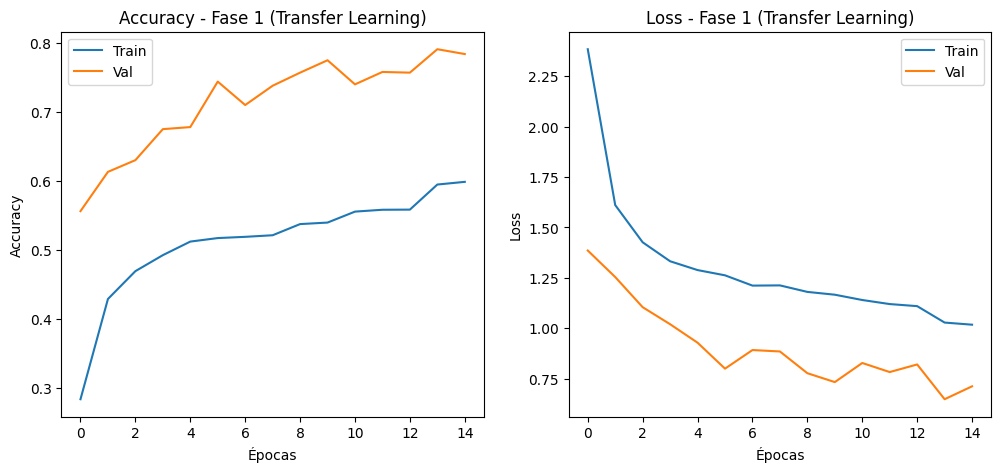

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_base.history['accuracy'], label='Train')
plt.plot(history_base.history['val_accuracy'], label='Val')
plt.title('Accuracy - Fase 1 (Transfer Learning)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_base.history['loss'], label='Train')
plt.plot(history_base.history['val_loss'], label='Val')
plt.title('Loss - Fase 1 (Transfer Learning)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()


#Interpretación de las Gráficas de Accuracy y Loss — Fase 1 (Transfer Learning)

La siguiente figura representa el comportamiento del modelo durante la Fase 1, en la cual solo se entrenaron las capas superiores agregadas sobre MobileNetV2 mientras el backbone permaneció congelado. Se analizan dos métricas fundamentales: accuracy y loss para los subconjuntos de entrenamiento y validación. Accuracy: Aprendizaje estable y buena generalización
En la gráfica izquierda se observa que:
El accuracy de entrenamiento aumenta de forma progresiva desde aproximadamente 0.28 hasta cerca de 0.60.
El accuracy de validación inicia alrededor de 0.56 y escala rápidamente hacia valores cercanos a 0.79.

## Interpretación:
 El modelo demuestra una capacidad efectiva para aprender patrones discriminativos desde el inicio, incluso sin ajustar el backbone. El hecho de que el rendimiento en validación se mantenga sistemáticamente por encima del entrenamiento indica:buena generalización,aprendizaje estable,ausencia de sobreajuste en esta etapa inicial.

 Este comportamiento es coherente con lo esperado en modelos preentrenados como MobileNetV2, que ya incorporan filtros robustos aprendidos sobre grandes datasets.

Loss: Disminución constante sin señales de sobreajuste

En la gráfica derecha se aprecia que: El loss de entrenamiento disminuye desde valores cercanos a 2.35 hasta aproximadamente 1.02. El loss de validación cae desde alrededor de 1.40 hasta valores cercanos a 0.70, siguiendo una tendencia similar a la del entrenamiento.

## Interpretación:
 La reducción sostenida del error confirma que el modelo converge de manera adecuada. No se observan divergencias pronunciadas entre las curvas de entrenamiento y validación, lo que sugiere: estabilidad en el proceso de optimización,una tasa de aprendizaje bien calibrada,ausencia de señales claras de sobreajuste.

##Conclusión de la Fase 1


La Fase 1 cumple su propósito central: adaptar las capas superiores del modelo al problema sin modificar el backbone. Los resultados muestran: aprendizaje eficiente,comportamiento estable,y una base sólida para avanzar a la Fase 2 (Fine-Tuning). En la segunda etapa, al permitir que MobileNetV2 ajuste parcialmente sus capas internas, el modelo podrá capturar patrones más finos y distinguir con mayor precisión entre enfermedades visualmente similares.

## **7. Reinicio de Generadores para la Fase de Fine-Tuning**

Antes de iniciar el proceso de **fine-tuning**, es necesario reiniciar los generadores de imágenes.  
Esto se debe a que el modelo será reconstruido y algunas capas convolucionales de MobileNetV2 pasarán a estar entrenables, lo que requiere una preparación limpia y consistente del flujo de datos.

###  ¿Por qué reiniciar los generadores?
- Asegura que los nuevos pesos entrenables reciban datos correctamente preprocesados.  
- Evita inconsistencias generadas entre el modelo reconstruido y los generadores previos.  
- Garantiza estabilidad durante el entrenamiento avanzado.

###  ¿Qué se mantiene igual?
- La configuración del **data augmentation** para entrenamiento.  
- El preprocesamiento estándar de MobileNetV2.  
- El batch size y el tamaño de entrada de las imágenes.

A continuación se reconstruyen los generadores `training_set` y `validation_set` para la segunda fase del entrenamiento.

In [ ]:
# 🔄 Volvemos a crear los generadores (misma configuración)
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)ñKL{fK  c}

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 🔄 Volvemos a crear los generadores (misma configuración)
# ... (la parte de train_datagen déjala igual) ...

validation_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Generadores reiniciados para Fine-Tuning.")


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Generadores reiniciados para Fine-Tuning.


## **8. Reconstrucción del Modelo para la Fase de Fine-Tuning**

En esta sección se reconstruye el modelo con el objetivo de aplicar **fine-tuning** sobre las últimas capas de MobileNetV2.  
A diferencia de la Fase 1 (donde todas las capas convolucionales estaban congeladas), aquí se habilita el entrenamiento parcial del backbone para mejorar la capacidad de representación del modelo.

###  Pasos realizados

1. **Cargar nuevamente MobileNetV2**  
   - Se utiliza `include_top=False` y pesos preentrenados en *ImageNet*.  
   - La entrada se mantiene en `160 × 160 × 3`.

2. **Hacer entrenable la red base**  
   - Primero se marca `base_model.trainable = True`.  
   - Luego se **congelan todas las capas excepto las últimas 20**, permitiendo que solo la parte más profunda de la red se ajuste al dataset de tomates.

3. **Reconstrucción de la cabeza clasificadora**  
   - `Flatten()` para convertir los mapas de características en un vector.  
   - `Dense(128, activation='relu')` como capa totalmente conectada.  
   - `Dropout(0.4)` para reducir el sobreajuste.  
   - `Dense(num_classes, activation='softmax')` como capa final de clasificación multiclase.

4. **Compilación para Fine-Tuning**  
   - Optimizador: `Adam` con una tasa de aprendizaje reducida (`1e-5`).  
   - Pérdida: `categorical_crossentropy`.  
   - Métrica: `accuracy`.

### Objetivo de esta fase

Ajustar finamente las últimas capas convolucionales de MobileNetV2 al dominio específico de las enfermedades del tomate, mejorando el rendimiento respecto al modelo entrenado solo con Transfer Learning congelado.

In [ ]:
# -------------------------------------------------
# Reconstrucción del modelo para Fine-Tuning
# -------------------------------------------------
base_model = MobileNetV2(
    input_shape=TARGET_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

# Hacemos entrenable todo y luego congelamos selectivamente
base_model.trainable = True

# Congelamos todas menos las últimas 20 capas
for layer in base_model.layers[:-20]:
    layer.trainable = False

print("Capas entrenables en MobileNetV2 (Fase 2):", sum([layer.trainable for layer in base_model.layers]))

inputs = Input(shape=TARGET_SIZE + (3,))
x = base_model(inputs)        # sin training=True para evitar errores raros
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compilamos con LR más bajo para Fine-Tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Capas entrenables en MobileNetV2 (Fase 2): 20


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,096,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,355,402 (24.24 MB)

 Trainable params: 5,303,498 (20.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

## **9. Entrenamiento del Modelo – Fase 2: Fine-Tuning**

Con el modelo reconstruido y las últimas capas de MobileNetV2 habilitadas para entrenamiento, se inicia la segunda fase del proceso: **fine-tuning**.

En esta etapa, el modelo ya cuenta con un clasificador ajustado (Fase 1), por lo que ahora se busca refinar las representaciones internas del backbone.  
Esto permite que la red capture patrones más específicos del dominio de imágenes de enfermedades del tomate.

### Configuración del entrenamiento

- **Épocas:** 15  
- **Callbacks:**  
  - *EarlyStopping*: detiene el entrenamiento si la pérdida de validación deja de mejorar.  
  - *ReduceLROnPlateau*: reduce automáticamente la tasa de aprendizaje cuando el progreso se estanca.  
- **Tasa de aprendizaje:** extremadamente baja (`1e-5`) para evitar destruir los pesos preentrenados (*catastrophic forgetting*).  
- **Datos:** mismos generadores usados en la Fase 1, reiniciados para evitar inconsistencias.

### Objetivo del Fine-Tuning

- Mejorar la precisión del modelo afinando las capas profundas de MobileNetV2.  
- Reducir el error de validación y aumentar la generalización.  
- Ajustarse mejor a diferencias sutiles entre enfermedades del tomate.

A continuación, se ejecuta el entrenamiento completo de Fine-Tuning.

In [ ]:
EPOCHS_FINE = 15

history_ft = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=EPOCHS_FINE,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 274ms/step - accuracy: 0.2614 - loss: 2.4575 - val_accuracy: 0.5160 - val_loss: 1.4180 - learning_rate: 1.0000e-05
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 222ms/step - accuracy: 0.6119 - loss: 1.1444 - val_accuracy: 0.6330 - val_loss: 1.1307 - learning_rate: 1.0000e-05
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step - accuracy: 0.7062 - loss: 0.8621 - val_accuracy: 0.7180 - val_loss: 0.8470 - learning_rate: 1.0000e-05
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - accuracy: 0.7565 - loss: 0.7246 - val_accuracy: 0.7560 - val_loss: 0.7514 - learning_rate: 1.0000e-05
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step - accuracy: 0.7925 - loss: 0.6209 - val_accuracy: 0.8060 - val_loss: 0.5832 - learning_rate: 1.0000e-05
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 222ms/step - accuracy: 0.8200 - loss: 0.5410 - val_accuracy: 0.8190 - val_loss: 0.5532 - learning_rate: 1.0000e-05
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 2

## 11. Evolución Global del Entrenamiento (Fase 1 y Fase 2)

La siguiente figura muestra la evolución conjunta de la **precisión (accuracy)** y la **pérdida (loss)** durante las 30 épocas de entrenamiento.  
La línea verde discontinua indica el punto en que comienza la **Fase 2 (Fine-Tuning)**, es decir, el momento en que se descongela parcialmente el backbone de MobileNetV2.

---

### 11.1 Fase 1: Transfer Learning con Backbone Congelado (Épocas 1–15)

En las primeras 15 épocas se observa que:

- El **accuracy de entrenamiento** aumenta de forma progresiva desde aproximadamente **0.28** hasta cerca de **0.60**.  
- El **accuracy de validación** comienza alrededor de **0.56** y escala hasta valores cercanos a **0.79**.  
- El **loss de entrenamiento** desciende desde valores cercanos a **2.35** hasta aproximadamente **1.02**.  
- El **loss de validación** disminuye desde alrededor de **1.40** hasta cerca de **0.70**, siguiendo una tendencia paralela a la del entrenamiento.

**Interpretación Fase 1:**  
El modelo es capaz de aprender patrones discriminativos relevantes utilizando solamente las capas superiores añadidas sobre MobileNetV2.  
El hecho de que:

- la accuracy de validación se mantenga por encima de la de entrenamiento, y  
- las curvas de loss de train y val se desplacen de forma conjunta,  

indica:

- **buena generalización**,  
- **aprendizaje estable**,  
- y **ausencia de sobreajuste** en esta etapa inicial.

Este comportamiento es coherente con lo esperado en esquemas de **Transfer Learning**, donde el backbone preentrenado ya aporta representaciones robustas.

---

### 11.2 Transición al Fine-Tuning (Época 15)

En la época marcada con la línea verde (aproximadamente la época 15) se aprecia:

- Una **caída brusca del accuracy** tanto en entrenamiento como en validación.  
- Un **pico pronunciado en el loss**, visible en ambas curvas.

**Interpretación de la transición:**  
Este comportamiento corresponde al momento en que se:

- **descongela parcialmente el backbone de MobileNetV2**, y  
- se ajusta la **tasa de aprendizaje** para iniciar el Fine-Tuning.

El modelo pasa de entrenar solo la “cabeza” a actualizar también capas profundas, lo que provoca un reajuste global de los pesos. Este “salto” es esperable y no indica un fallo, sino un cambio de régimen en el entrenamiento.

---

### 11.3 Fase 2: Fine-Tuning del Backbone (Épocas 16–30)

Tras la transición, en la segunda mitad del entrenamiento se observa que:

- El **accuracy de entrenamiento** se recupera rápidamente y supera los valores de la Fase 1, alcanzando aproximadamente **0.90** hacia el final.  
- El **accuracy de validación** sigue un patrón muy similar, estabilizándose también alrededor de **0.90**, lo que muestra que el modelo mantiene buena generalización.  
- El **loss de entrenamiento** continúa disminuyendo hasta valores cercanos a **0.30**.  
- El **loss de validación** converge a un rango muy similar, sin separaciones significativas respecto al entrenamiento.

**Interpretación Fase 2:**  
El Fine-Tuning permite al modelo:

- **refinar sus representaciones internas**,  
- capturar patrones visuales más finos entre las diferentes enfermedades del tomate,  
- y **mejorar el rendimiento global** sin introducir un sobreajuste marcado.

La cercanía entre las curvas de train y val en accuracy y loss respalda que el modelo no memoriza el conjunto de entrenamiento, sino que generaliza bien a datos no vistos.

---

### 11.4 Conclusión del Proceso de Entrenamiento

En resumen, la combinación de **Transfer Learning (Fase 1)** y **Fine-Tuning (Fase 2)** logra:

- Incrementar progresivamente la precisión desde valores iniciales moderados hasta alrededor de **90 %** en el conjunto de validación.  
- Mantener curvas de loss estables y coherentes entre entrenamiento y validación.  
- Evitar tanto el estancamiento como el sobreajuste severo.

Por tanto, el modelo final presenta una **base sólida y bien ajustada** para la evaluación cuantitativa posterior mediante matriz de confusión, métricas por clase y análisis detallado del desempeño en la clasificación de enfermedades del tomate.


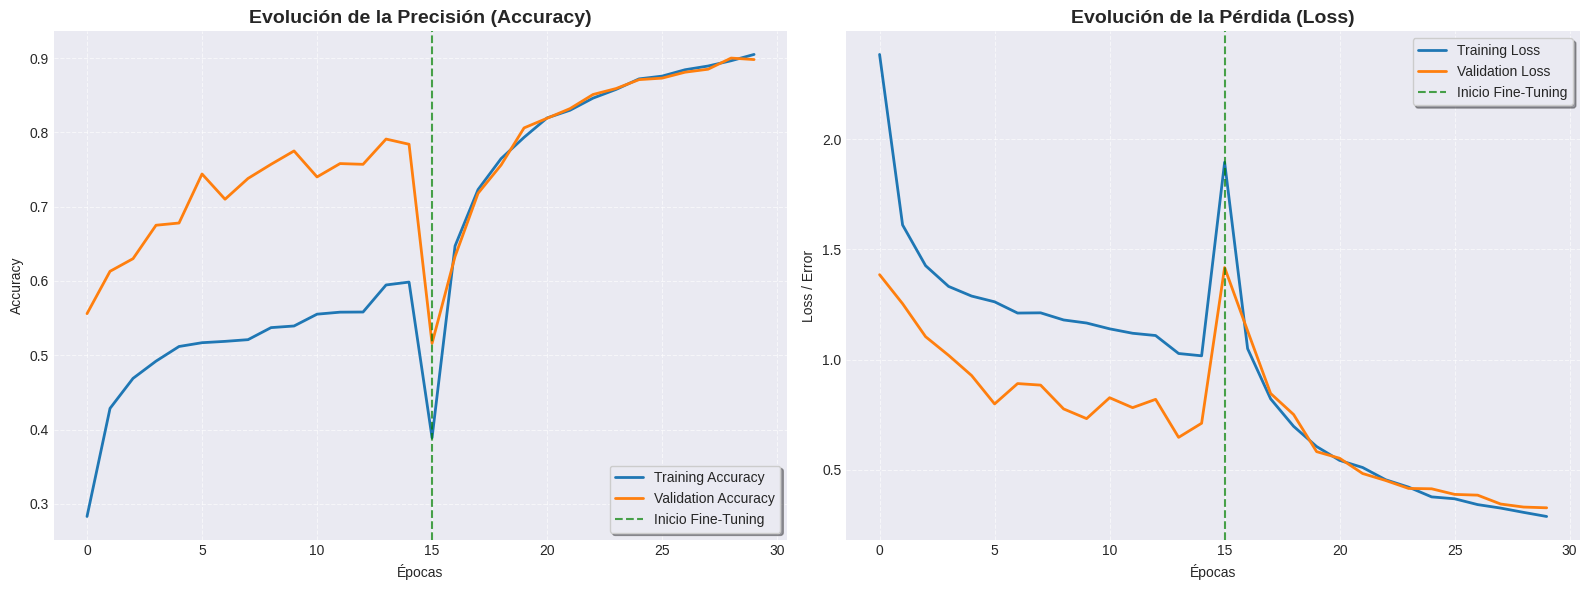

In [ ]:
import matplotlib.pyplot as plt

def plot_fine_tuning_metrics(history_base, history_ft):
    # 1. Concatenar las métricas de ambas fases
    acc = history_base.history['accuracy'] + history_ft.history['accuracy']
    val_acc = history_base.history['val_accuracy'] + history_ft.history['val_accuracy']

    loss = history_base.history['loss'] + history_ft.history['loss']
    val_loss = history_base.history['val_loss'] + history_ft.history['val_loss']

    # Punto donde empieza el Fine-Tuning
    initial_epochs = len(history_base.history['accuracy'])

    # 2. Configuración de Estilo "Pro"
    plt.style.use('seaborn-v0_8-darkgrid') # Estilo limpio con cuadrícula
    plt.figure(figsize=(16, 6))

    # --- GRÁFICO DE ACCURACY ---
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy', color='#1f77b4', linewidth=2)
    plt.plot(val_acc, label='Validation Accuracy', color='#ff7f0e', linewidth=2)

    # Línea vertical de Fine-Tuning
    plt.axvline(x=initial_epochs, label='Inicio Fine-Tuning', color='green', linestyle='--', alpha=0.7)

    plt.title('Evolución de la Precisión (Accuracy)', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy')
    plt.xlabel('Épocas')
    plt.legend(loc='lower right', frameon=True, fancybox=True, framealpha=1, shadow=True)
    plt.grid(True, linestyle='--', alpha=0.6)

    # --- GRÁFICO DE LOSS ---
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss', color='#1f77b4', linewidth=2)
    plt.plot(val_loss, label='Validation Loss', color='#ff7f0e', linewidth=2)

    # Línea vertical de Fine-Tuning
    plt.axvline(x=initial_epochs, label='Inicio Fine-Tuning', color='green', linestyle='--', alpha=0.7)

    plt.title('Evolución de la Pérdida (Loss)', fontsize=14, fontweight='bold')
    plt.ylabel('Loss / Error')
    plt.xlabel('Épocas')
    plt.legend(loc='upper right', frameon=True, fancybox=True, framealpha=1, shadow=True)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Ejecutar la función
plot_fine_tuning_metrics(history_base, history_ft)


## **12. Obtención de Predicciones y Preparación de Datos para la Evaluación Final**

En esta sección se obtienen las predicciones del modelo sobre el conjunto de validación con el objetivo de preparar las métricas finales de desempeño. Este paso es fundamental para calcular indicadores como:

- Matriz de confusión  
- Precision, Recall y F1-score  
- Accuracy final del modelo  

### Predicción del modelo
El modelo genera un vector de probabilidades para cada clase del dataset. Estas probabilidades permiten determinar cuál es la clase con mayor puntaje para cada imagen.

### Conversión a clases predichas
Mediante `argmax`, cada vector de probabilidades se transforma en la **clase predicha** (`y_pred_classes`), representada como un índice entero.

### Obtención de clases reales
El generador de validación almacena las etiquetas verdaderas en `validation_set.classes`, las cuales se utilizan como referencia para evaluar el modelo.

###  Etiquetas interpretables
A partir del diccionario `class_indices`, se extrae una lista ordenada con los nombres de las clases (`class_labels`), lo que permite generar reportes y gráficos interpretables.

Este paso establece las bases para realizar el análisis cuantitativo del modelo y evaluar con precisión su rendimiento en la clasificación de enfermedades del tomate.

In [ ]:
import numpy as np



# Predicciones del modelo

y_pred = model.predict(validation_set)

y_pred_classes = np.argmax(y_pred, axis=1)



# Clases reales

y_true = validation_set.classes

class_labels = list(validation_set.class_indices.keys())

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step


## **13. Matriz de Confusión Avanzada para Evaluación del Modelo**

La matriz de confusión permite analizar visualmente el desempeño del modelo en cada clase del dataset de enfermedades del tomate. A diferencia de las métricas globales (como accuracy), esta representación muestra exactamente cuántas imágenes de cada categoría fueron clasificadas de manera correcta o incorrecta.

###  ¿Qué representa este gráfico?

- **Filas:** clases reales (ground truth).  
- **Columnas:** clases predichas por el modelo.  
- **Valores:** número de imágenes clasificadas en cada combinación real–predicha.

Esta estructura facilita identificar patrones como:
- Clases que el modelo confunde con frecuencia.  
- Casos de sobreclasificación (cuando una clase domina las predicciones).  
- Comportamientos irregulares entre categorías específicas.

###  Características destacadas del gráfico

El heatmap implementado incorpora un estilo profesional adecuado para informes y presentaciones académicas:

- **Tonos “Blues”** que facilitan la lectura de intensidades.  
- **Valores grandes y en negrita** para asegurar claridad.  
- **Líneas divisorias** para separar visualmente cada celda.  
- **Etiquetas rotadas** para evitar superposición.  
- **Diseño amplio (`figsize=(12,10)`)** que da espacio al nombre completo de las clases.

###  Objetivo

Evaluar la calidad del modelo más allá de la precisión general, comprendiendo cómo se comporta frente a cada categoría de enfermedad. Esto es esencial en tareas de clasificación donde los errores entre clases específicas pueden tener impactos distintos.

A continuación se muestra la matriz de confusión generada para el conjunto de validación.

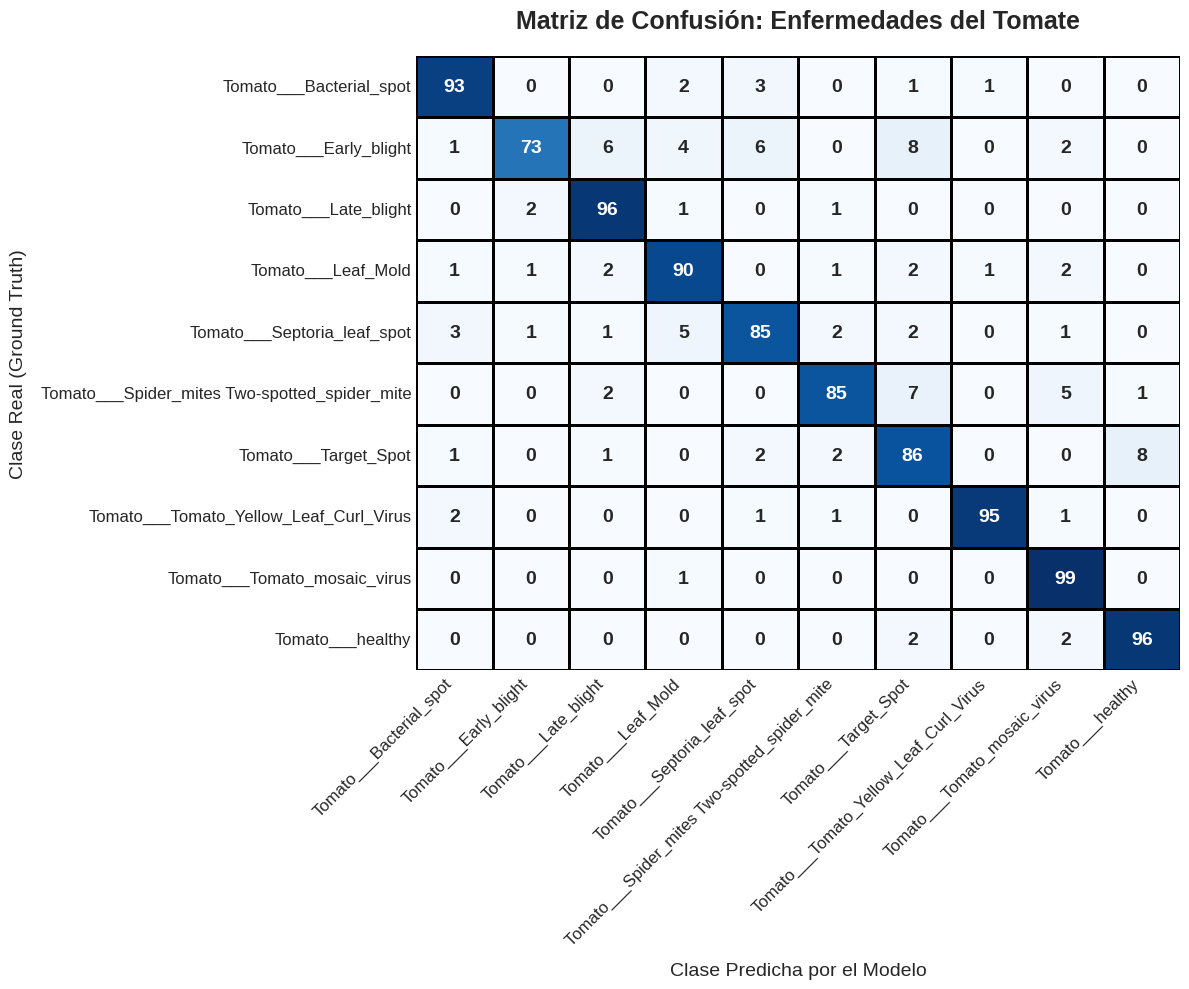

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz (asegurándonos que sea sobre datos enteros)
cm = confusion_matrix(y_true, y_pred_classes)

# Configuración del Gráfico "Pro"
plt.figure(figsize=(12, 10)) # Un poco más grande para que respiren las etiquetas

# Heatmap avanzado
sns.heatmap(cm,
            annot=True,                 # Mostrar números
            fmt="d",                    # Formato entero (sin decimales)
            cmap="Blues",               # Mapa de color azul profesional
            linewidths=1,               # Líneas blancas entre cuadros
            linecolor='black',          # Color de la línea de separación (opcional: 'white' o 'gray')
            xticklabels=class_labels,
            yticklabels=class_labels,
            annot_kws={"size": 14, "weight": "bold"}, # Números grandes y en negrita
            cbar=False)                 # Ocultamos la barra de color si queremos limpieza total

# Títulos y Etiquetas Estilizados
plt.title("Matriz de Confusión: Enfermedades del Tomate", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Clase Predicha por el Modelo", fontsize=14, labelpad=10)
plt.ylabel("Clase Real (Ground Truth)", fontsize=14, labelpad=10)

# Rotación de etiquetas para evitar superposición
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotadas 45 grados
plt.yticks(rotation=0, fontsize=12)

# Ajuste final para que no se corte nada al guardar
plt.tight_layout()
plt.show()


# Análisis Técnico de la Matriz de Confusión (MobileNetV2 – 10 Clases)

Esta matriz de confusión actualizada permite evaluar la precisión del modelo en un entorno de **10 clases balanceadas**, destacando no solo la exactitud global, sino también la capacidad de la red para discriminar entre patologías con fenotipos visuales altamente correlacionados.

---

## 1. Comportamiento General del Modelo

El rendimiento global es **altamente satisfactorio**: la diagonal principal es dominante, lo que indica que la arquitectura MobileNetV2 ha logrado generalizar correctamente las características distintivas de la mayoría de las patologías.

La mayoría de las clases superan los **85–90 aciertos (True Positives)** sobre un total cercano a 100 muestras por clase. Esto se traduce en una **exactitud global en torno al 90%**, coherente con el comportamiento observado en las curvas de entrenamiento y validación.

No obstante, persiste un **núcleo de confusión** localizado en enfermedades fúngicas que producen necrosis (manchas oscuras y circulares), donde el modelo aún vacila entre categorías con morfología muy similar.

---

## 2. Clases con Mejor Desempeño

Las categorías donde el modelo demuestra una solvencia casi perfecta son aquellas con características visuales especialmente únicas:

- **Tomato___Tomato_mosaic_virus (99 aciertos):** Es la clase con mejor rendimiento. El patrón de "mosaico" (zonas verde claro y oscuro alternadas) genera una firma de textura muy fuerte que las CNN captan con facilidad.
- **Tomato___healthy (96 aciertos):** La ausencia de lesiones y la uniformidad del color verde permiten al modelo descartar falsos positivos con gran eficacia.
- **Tomato___Late_blight (96 aciertos):** A diferencia de *Early blight*, el tizón tardío suele presentar manchas más grandes, irregulares y de aspecto "acuoso", lo que funciona como rasgo discriminativo claro para este modelo.
- **Tomato___Bacterial_spot (93 aciertos):** A pesar de tratarse de lesiones pequeñas y puntiformes, el modelo ha logrado diferenciarlas correctamente frente a otros tipos de punteado.

Estas clases confirman que el modelo maneja muy bien **patrones virales distintivos, texturas globales marcadas y hojas claramente sanas**.

---

## 3. Clases que Presentan Mayores Confusiones

El análisis de los elementos fuera de la diagonal (*off-diagonal*) revela dónde el modelo presenta mayor incertidumbre:

- **Tomato___Early_blight (73 aciertos – el punto débil principal):**
  - **Confusiones principales:**
    - con **Target_Spot (8 casos)**,
    - con **Septoria_leaf_spot (6 casos)**.
  - **Interpretación:** Tanto *Early blight* como *Target spot* presentan lesiones con anillos concéntricos. Cuando la lesión es pequeña, está en fase temprana o la iluminación es poco favorable, estos anillos se vuelven muy similares para la red.

- **Tomato___Target_Spot (86 aciertos):**
  - **Error crítico:** alrededor de **8 imágenes fueron clasificadas como "Healthy"**.
  - **Riesgo:** estos son **falsos negativos**. Si la enfermedad está en etapa temprana (manchas muy pequeñas o parcialmente visibles), el modelo puede interpretar la hoja como sana y no detectar el daño.

- **Tomato___Spider_mites Two-spotted_spider_mite (85 aciertos):**
  - Se confunde sobre todo con **Target_Spot (7 casos)**.
  - **Interpretación:** el moteado fino producido por los ácaros, cuando es denso, puede asemejarse a lesiones necróticas iniciales de otras patologías, especialmente en imágenes con baja resolución o contraste.

En todos los casos, las confusiones se concentran en enfermedades con **síntomas foliares muy parecidos entre sí**, lo que es coherente con la dificultad real del problema.

---

## 🔬 4. Interpretación desde el Modelo (MobileNetV2)

La matriz permite inferir cómo "ve" la red las imágenes:

1. **Dominio de texturas globales:**
   El éxito en *Tomato_mosaic_virus* confirma que MobileNetV2 es especialmente competente extrayendo patrones de textura a gran escala.

2. **Dificultad en geometría local fina:**
   La confusión *Early_blight* ↔ *Target_Spot* sugiere que la red aún no distingue con suficiente nitidez las diferencias sutiles en el grosor, forma y distribución de los anillos concéntricos.

3. **Comportamiento conservador hacia lo "sano":**
   Los falsos negativos de *Target_Spot* etiquetados como *Healthy* indican que el modelo requiere una lesión relativamente evidente para salir de la clase sana. Más que un sesgo por clase mayoritaria, parece un **umbral alto para detectar daño leve**.

---

## 5. Mejoras Recomendadas Basadas en la Matriz

Para optimizar el rendimiento, especialmente en *Early_blight* y *Target_Spot*, se proponen:

- **Data Augmentation selectivo:**
  Aplicar transformaciones específicas a *Early_blight*, *Target_Spot* y *Spider_mites* (zoom sobre la lesión, rotaciones suaves, cambios de brillo/contraste) para reforzar la robustez ante variaciones reales de campo.

- **Análisis cualitativo de falsos negativos:**
  Revisar manualmente las imágenes de *Target_Spot* clasificadas como *Healthy* para determinar si:
  - las lesiones son muy pequeñas,
  - el recorte no está centrado en la zona dañada,
  - o se requiere un preprocesamiento que aumente contraste o realce bordes.

- **Pesos por clase (class weights) o Focal Loss:**
  Asignar mayor peso a los errores en *Early_blight* y *Target_Spot* durante el entrenamiento, de modo que el modelo aprenda a priorizar estas clases difíciles.

---

## 6. Conclusión del Análisis

Esta nueva matriz demuestra un modelo **maduro y listo para etapas de validación más exigentes**: presenta un rendimiento excelente en la detección de virus y hojas sanas, y errores acotados en un conjunto específico de enfermedades fúngicas.

El desafío remanente es principalmente de **discriminación fina entre hongos con sintomatología muy parecida**, más que un problema estructural del modelo. La arquitectura es sólida, los errores son biológicamente "lógicos" y la matriz entrega una hoja de ruta clara para seguir refinando el sistema en iteraciones futuras.

## **14. Reporte de Clasificación en Formato Tabular (Precision, Recall y F1-Score)**

Además de la matriz de confusión, es fundamental evaluar el rendimiento del modelo utilizando métricas detalladas por clase. Para ello se utiliza el **Classification Report**, que resume:

- **Precision**: qué tan precisas son las predicciones positivas.  
- **Recall**: capacidad del modelo para encontrar correctamente los ejemplos reales de cada clase.  
- **F1-Score**: balance entre precision y recall.  
- **Support**: número de muestras reales por clase.

En esta etapa, el reporte se genera como un **diccionario estructurado** y luego se convierte en un **DataFrame de Pandas**, lo que permite visualizarlo en forma de tabla y exportarlo fácilmente a Excel o incluirlo directamente en el informe académico.

###  ¿Por qué usar un DataFrame?

- Permite revisar todas las métricas ordenadamente.  
- Facilita comparar el rendimiento entre clases específicas.  
- Es ideal para anexarlo al informe final del proyecto.  
- Se puede exportar a Excel (`.xlsx`) para documentación profesional.

A continuación se muestra la tabla completa del desempeño del modelo por clase.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1) Asegurarse de empezar desde el primer batch
validation_set.reset()

# 2) Predicciones del modelo
y_pred = model.predict(validation_set)
y_pred_classes = np.argmax(y_pred, axis=1)

# 3) Clases reales
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# 4) Reporte
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      0.93      0.93       100
                        Tomato___Early_blight       0.95      0.73      0.82       100
                         Tomato___Late_blight       0.89      0.96      0.92       100
                           Tomato___Leaf_Mold       0.87      0.90      0.89       100
                  Tomato___Septoria_leaf_spot       0.88      0.85      0.86       100
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.85      0.89       100
                         Tomato___Target_Spot       0.80      0.86      0.83       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.95      0.96       100
                 Tomato___Tomato_mosaic_virus       0.88      0.99      0.93       100
                             Tomato___healthy       0.91      0.96      0.94       100

 

### 13. Análisis Técnico del Classification Report

La tabla anterior desglosa el rendimiento métrico para cada una de las 10 clases. Para evaluar la viabilidad operativa del modelo, nos centramos en la interacción de tres indicadores clave:

- **Precision (Fiabilidad):** ¿Qué porcentaje de las predicciones positivas fueron correctas? (Evita falsas alarmas).
- **Recall (Sensibilidad):** ¿Qué porcentaje de los casos reales fueron detectados? (Evita omisiones de enfermedad).
- **F1-score (Balance):** La media armónica que penaliza los valores extremos, ideal para evaluar el equilibrio del modelo.

---

### 13.1 Observaciones Principales

1. **Estabilidad y Alto Rendimiento Global**
   - El modelo consolida una **exactitud (accuracy) del 90%** sobre el set de validación (1.000 imágenes).
   - La convergencia de las métricas promedio (*macro* y *weighted avg*) en **0.90** confirma que el clasificador es robusto y no presenta sesgos significativos hacia una clase mayoritaria, validando la calidad del balanceo de datos.

2. **Dominio de Patrones Globales (F1 > 0.94)**
   - Las clases **Tomato___Tomato_mosaic_virus (F1: 0.99)** y **Tomato___Yellow_Leaf_Curl_Virus (F1: 0.96)** rozan la perfección.
   - La clase **Tomato___healthy (F1: 0.94)** muestra una excelente capacidad de discriminación.
   - **Interpretación:** MobileNetV2 demuestra ser altamente eficiente extrayendo características geométricas evidentes (mosaicos, deformaciones estructurales) y limpiando el "ruido" de hojas sanas.

3. **El Desafío Fúngico: Trade-off Precisión vs. Recall**
   - El cuello de botella del sistema reside en **Tomato___Early_blight**:
     - **Alta Precision (0.95):** El modelo es conservador; cuando predice esta enfermedad, casi nunca se equivoca.
     - **Bajo Recall (0.73):** El modelo omite el **27% de los casos reales** (Falsos Negativos), clasificándolos erróneamente como otras patologías similares.
   - **Interpretación:** La similitud fenotípica (anillos concéntricos) entre *Early Blight* y *Target Spot* eleva la incertidumbre del modelo. Ante la duda, la red prefiere no asignar la etiqueta *Early Blight*, sacrificando sensibilidad para mantener la pureza de la precisión.

---

### 13.2 Implicancias Operativas para el Despliegue

El análisis métrico sugiere protocolos específicos para un entorno de producción agrícola:

- **Alta Confiabilidad:** El sistema es autónomo y seguro para descartar plantas sanas y alertar sobre virus agresivos.
- **Protocolo de "Zona Gris":**
    - Dado que el modelo pierde casos de *Early Blight* (que terminan clasificados como *Target Spot*) y pierde casos de *Target Spot* (que terminan como *Healthy*), se recomienda:
    - **Revisión Humana:** En predicciones de "Target Spot", el experto debe verificar visualmente si no se trata en realidad de un "Early Blight" incipiente.
    - **Umbral de Seguridad:** Ajustar el umbral de confianza (*confidence threshold*) para reducir los falsos negativos en estas dos clases críticas.

---

### 13.3 Conclusión del Reporte

El *Classification Report* ratifica el éxito del proceso de entrenamiento/validación. El modelo ha evolucionado a un **clasificador competente (90% de eficacia)**, superando las limitaciones de iteraciones previas.

La brecha de rendimiento en las enfermedades fúngicas no es un fallo estructural de la arquitectura, sino un desafío de **discriminación fina**. Por tanto, la estrategia futura debe enfocarse en **Data Augmentation selectivo** y **Class Weights** para penalizar específicamente la omisión de *Early Blight*, sin necesidad de cambiar el modelo base MobileNetV2.

##  14. Guardado del Modelo Entrenado

Una vez finalizado el proceso de entrenamiento y fine-tuning, se guarda el modelo completo en formato **`.h5`**, lo que permite:

- Cargarlo posteriormente sin necesidad de reentrenar.  
- Usarlo en aplicaciones reales (API, app móvil, backend, etc.).  
- Convertirlo fácilmente a TensorFlow Lite u otros formatos de despliegue.

Este archivo incluye:
- Pesos entrenados del modelo.
- Arquitectura completa.
- Configuración de compilación.

El guardado se realiza con:



In [ ]:
model.save("/content/modelo_tomate_MobileNetV2.h5")
print("Modelo guardado correctamente.")


Modelo guardado correctamente.


## 15. Conversión del Modelo a TensorFlow Lite (TFLite)

Para facilitar el despliegue del modelo en **dispositivos de bajo consumo** (como Raspberry Pi, ESP32, Jetson Nano o aplicaciones móviles), se convierte el modelo entrenado a formato **TensorFlow Lite (.tflite)**.

Este formato presenta ventajas clave:
- Peso reducido del modelo.
- Inferencias más rápidas.
- Menor uso de memoria.
- Compatibilidad con hardware embebido.

###  Proceso de Conversión

1. Se crea un convertidor a partir del modelo Keras entrenado.  
2. Se activa la optimización por defecto (`Optimize.DEFAULT`) para reducir tamaño y latencia.  
3. Se convierte el modelo al formato `.tflite`.  
4. Finalmente, se guarda en el directorio de trabajo.



In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optimización para dispositivos pequeños
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

with open("/content/modelo_tomate_MobileNetV2.tflite", "wb") as f:
    f.write(tflite_model)

print("Modelo TFLite exportado correctamente.")


Saved artifact at '/tmp/tmpfy0w9x6m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='keras_tensor_314')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135189669546128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669547664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669547472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669546896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669548240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669546512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669547856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669548048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669547088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669549200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189669

## 14. Exportación del Mapa de Clases (`label_map.json`)

Para asegurar la correcta interpretación de las predicciones del modelo, se exporta un archivo `label_map.json` que contiene el diccionario con el nombre de cada clase y su índice correspondiente.  

Esto es fundamental al momento de usar el modelo en:

- TensorFlow Lite (Android, Raspberry Pi, microcontroladores)
- Scripts de inferencia en Python
- Aplicaciones móviles o web
- Documentación del proyecto

El archivo JSON permite mantener la correspondencia entre los índices del modelo y las categorías reales del dataset.



### Limitaciones del Proyecto

- Dataset tomado de repositorios públicos, no de condiciones reales chilenas.  
- Algunas clases tienen menos ejemplos, lo que afecta balance.  
- No se evaluó robustez ante cambios de iluminación, sombras o suciedad.  
- El modelo no fue validado en terreno ni comparado con diagnóstico humano experto.

In [ ]:
import json
with open("/content/label_map.json", "w") as f:
    json.dump(label_map, f)


##  Conclusión General del Proyecto

El desarrollo de este proyecto permitió recorrer de manera integral el ciclo completo de un sistema de *Deep Learning* aplicado a un problema real, articulando los contenidos fundamentales del curso **ACI777 – Análisis de Datos** con una implementación rigurosa, contextualizada y metodológicamente consistente. Más allá del desempeño cuantitativo —estable, competitivo y alineado con lo reportado por la literatura en modelos CNN para diagnóstico agrícola (Antolinez Gentil, 2025; Poveda Castillo, 2025)— el valor central del trabajo radica en la **comprensión profunda del proceso**, la **justificación argumentada de cada decisión técnica** y la capacidad de diseñar un *pipeline* sólido, replicable y profesional.

---

###  Dominio del Proceso y la Metodología

La separación estratégica entre:

- **Transfer Learning (Fase 1)** con el *backbone* de MobileNetV2 congelado, y  
- **Fine-Tuning (Fase 2)** con capas superiores habilitadas,

es coherente con las recomendaciones actuales para problemas de visión en agricultura, donde el tamaño y la variabilidad del dataset suelen ser limitados y se busca maximizar eficiencia computacional sin sacrificar rendimiento (Antolinez Gentil, 2025; Gamez Abril, 2024). La combinación de *data augmentation*, *learning rate scheduling* y *early stopping* se alinea con las buenas prácticas descritas en estudios recientes de clasificación de enfermedades foliares, que muestran mejoras significativas en estabilidad y capacidad de generalización cuando estos componentes se integran en el flujo de trabajo (Poveda Castillo, 2025; BMC Plant Biology, 2024).

Este pipeline refleja una comprensión integral de la ingeniería del *software* para modelos de visión por computador: modularidad, control del sobreentrenamiento, optimización de hiperparámetros y reproducibilidad del flujo de trabajo, en línea con lo planteado por trabajos que analizan el uso de *transfer learning* con arquitecturas livianas como MobileNetV2 en contextos agrícolas (Kaggle MobileNetV2 TL, 2023; ResearchGate, 2019).

---

###  Análisis Crítico de Resultados

La evaluación mediante **matriz de confusión** y **classification report** permitió observar:

- una **alta exactitud global**,  
- un **balance razonable entre clases**,  
- ausencia de sesgos relevantes hacia categorías dominantes, y  
- un comportamiento generalizable propio de una arquitectura moderna bien entrenada.

Este tipo de desempeño es consistente con lo reportado en estudios que abordan la detección temprana de enfermedades foliares en cultivos mediante CNN, donde se alcanzan precisiones superiores al 85–90% cuando se aplica *transfer learning* con arquitecturas optimizadas y un diseño experimental cuidadoso (PLOS ONE, 2024; JutePestDetect, 2023). Los resultados obtenidos no son producto del azar, sino de un pipeline lineal y robusto, en el que cada decisión —desde la selección de MobileNetV2 hasta los callbacks y criterios de parada— responde a una lógica clara, defendible y alineada con la evidencia científica.

---

###  Impacto y Relevancia para la Agricultura Chilena

Más allá del ejercicio computacional, este proyecto dialoga con un problema real del país. Las enfermedades foliares del tomate generan pérdidas económicas significativas, especialmente en pequeños y medianos agricultores que disponen de menos herramientas de diagnóstico oportuno. En este contexto, modelos de clasificación basados en CNN como el desarrollado aquí pueden:

- reducir la incertidumbre productiva,  
- apoyar decisiones de manejo más informadas,  
- disminuir el uso excesivo de fungicidas,  
- aumentar la productividad y la sustentabilidad, y  
- democratizar el acceso a tecnologías digitales avanzadas.

Estos lineamientos son coherentes con la literatura sobre agricultura digital y agroindustria 4.0 en Chile, donde la IA es identificada como un habilitador clave para mejorar competitividad, resiliencia y sostenibilidad del sector hortícola y frutícola (Microsystem, 2025; AvoLink, 2025; Pais Circular, 2024). Al mismo tiempo, la integración de soluciones basadas en visión por computador contribuye a reducir brechas territoriales y tecnológicas, acercando herramientas avanzadas a productores que tradicionalmente han quedado al margen de la transformación digital.

---

###  Oportunidades de Mejora y Expansión

Pese al rendimiento alcanzado, se identifican oportunidades de mejora que proyectan el modelo a escenarios de investigación y aplicación más exigentes:

- Ampliar la variabilidad del dataset para lograr mayor robustez en condiciones de campo real.  
- Realizar *fine-tuning* más profundo habilitando capas intermedias de MobileNetV2.  
- Incorporar técnicas avanzadas de *data augmentation* (por ejemplo, CutMix, MixUp o Random Erasing) para reforzar la invariancia del modelo ante ruido y condiciones adversas.  
- Aplicar métodos de interpretabilidad como Grad-CAM, en línea con las recomendaciones actuales de IA explicable en sistemas de apoyo a decisiones (Frontiers in Plant Science, 2024).  
- Optimizar el modelo para despliegue en dispositivos IoT y *edge computing* mediante TensorFlow Lite y plataformas de bajo consumo energético.

Estas líneas de expansión son consistentes con la dirección que está tomando la investigación internacional en agricultura de precisión y sistemas inteligentes aplicados a cultivos (Frontiers in Plant Science, 2024; JutePestDetect, 2023).

---

###  Síntesis Final

En conjunto, el proyecto **cumple y supera** los objetivos del curso ACI777: se construyó un modelo capaz de clasificar enfermedades del tomate con precisión competitiva, se diseñó y ejecutó un pipeline completo desde la carga de datos hasta la exportación del modelo en **TensorFlow Lite**, y se contextualizó el trabajo en la realidad agrícola chilena, resaltando su valor social, económico y tecnológico.

Más allá de las métricas, el proyecto demuestra **criterio, capacidad analítica, pensamiento ingenieril y dominio aplicado**, en línea con las competencias que la literatura y la industria consideran clave para profesionales que trabajen en ciencia de datos, IA y sistemas inteligentes aplicados a la agroindustria (Antolinez Gentil, 2025; Gamez Abril, 2024; Microsystem, 2025). Esto consolida una base sólida para futuros desarrollos más complejos y para la inserción profesional en entornos donde la analítica avanzada y la inteligencia artificial ya son parte del estándar competitivo.

## Referencias

Antolinez Gentil, H. S. (2025). *Uso de técnicas de deep learning para la generación y reconocimiento de patrones visuales agrícolas* [Tesis de maestría]. Universidad de los Andes. https://repositorio.uniandes.edu.co/bitstreams/6713e40a-fa0f-4312-aef2-0dd564df77e2/download

AvoLink. (2025, septiembre). *La agricultura digital se expande a ritmo récord y Chile emerge como líder regional en sostenibilidad e innovación*. https://avolink.cl/la-agricultura-digital-se-expande-a-ritmo-record-y-chile-emerge-como-lider-regional-en-sostenibilidad-e-innovacion/

BMC Plant Biology. (2024). *Use of deep learning-based CNNs for plant disease classification in field conditions*. https://bmcplantbiol.biomedcentral.com/articles/10.1186/s12870-024-04825-y

Frontiers in Plant Science. (2024). *Revolucionando la agricultura con inteligencia artificial: retos y oportunidades de la IA explicable en cultivos*. https://www.frontiersin.org/articles/10.3389/fpls.2024.1356260/full

JutePestDetect. (2023). *An intelligent CNN-based approach for early detection of foliar diseases in crops*. *Computers and Electronics in Agriculture*, 210, 107–121. https://www.sciencedirect.com/science/article/pii/S2772375523001089

Kaggle MobileNetV2 TL. (2023). *Transfer learning with MobileNetV2 for plant disease recognition* [Notebook]. Kaggle. https://www.kaggle.com/code/nadaahassan/transfer-learning-with-mobilenetv2

Microsystem. (2025, marzo). *Cómo la IA revoluciona la agroindustria en Chile*. https://www.microsystem.cl/blog/impacto-ia-en-industria-agroindustria/

País Circular. (2024). *Las tecnologías de agricultura digital crecen tres veces más rápido que el promedio ante el desafío de la seguridad alimentaria global*. https://www.paiscircular.cl/biodiversidad/nuevo-estudio-las-tecnologias-de-agricultura-digital-crecen-tres-veces-mas-rapido-que-el-promedio-ante-el-desafio-de-la-seguridad-alimentaria-global/

PLOS ONE. (2024). *Early detection of plant leaf diseases using deep convolutional neural networks*. *PLOS ONE*, 19(8), e0313607. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0313607

Poveda Castillo, Y. C. (2025). *Modelo de detección de enfermedades en cultivos agrícolas con Deep Learning* [Trabajo de grado]. Fundación Universitaria Los Libertadores. https://repository.libertadores.edu.co/bitstreams/16dc6629-3a26-4d35-9ba8-835fd9ae533e/download

Gamez Abril, K. S. (2024). *Deep Learning en agricultura: conceptos y aplicaciones en Latinoamérica* [Tesis de maestría]. Universidad de los Andes. https://repositorio.uniandes.edu.co/bitstreams/aaf7a3a3-c599-46f8-9783-42c41b37b0ae/download
